# Windy Gridworld

Shown inset below is a standard gridworld, with start ($S$) and goal ($G$) states, but with 1 difference: there is a crosswind running upward through the middle of the grid.
- The actions are the standard 4: $up, down, right, left$ — but in the middle region the resultant next states are shifted upward by a “wind,” the strength of which varies from column to column.
- The strength of the wind is given below each column, in number of cells shifted upward.
  - For example, if you are 1 cell to the right of the goal, then the action $left$ takes you to the cell just above the goal.
- This is an undiscounted ($\gamma=1$) episodic task, with constant rewards of -1 until the goal state is reached.

In [1]:
from IPython.display import Image

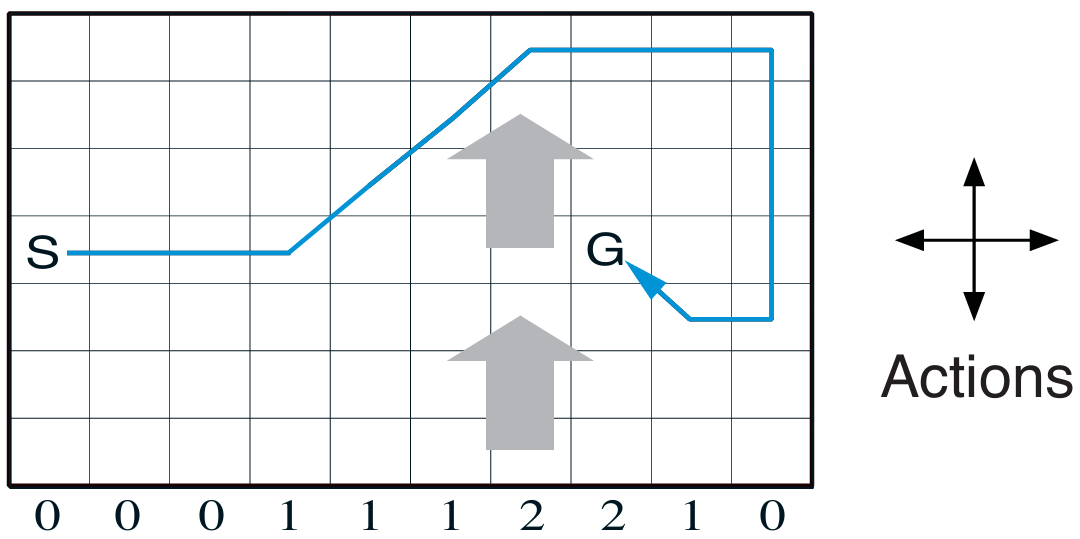

In [2]:
Image(filename="../book_images/Example_6_5_inset.PNG")

The graph below shows the results of applying $\varepsilon$-greedy SARSA to this task, with $\varepsilon=0.1, \alpha=0.5$, and the initial values $Q(s,a)=0, \forall s,a$.
- The increasing slope of the graph shows that the goal was reached more quickly over time.
  - By  8000 time steps, the greedy policy was long since optimal (a trajectory from it is shown inset);
  - continued $\varepsilon$-greedy exploration kept the average episode length at about 17 steps, 2 more than the minimum of 15.
- Note that MCMs cannot easily be used here because termination is not guaranteed for all policies.
  - If a policy was ever found that caused the agent to stay in the same state, then the next episode would never end.
- Online learning methods such as SARSA do not have this problem because they quickly learn during the episode that such policies are poor, and switch to something else.

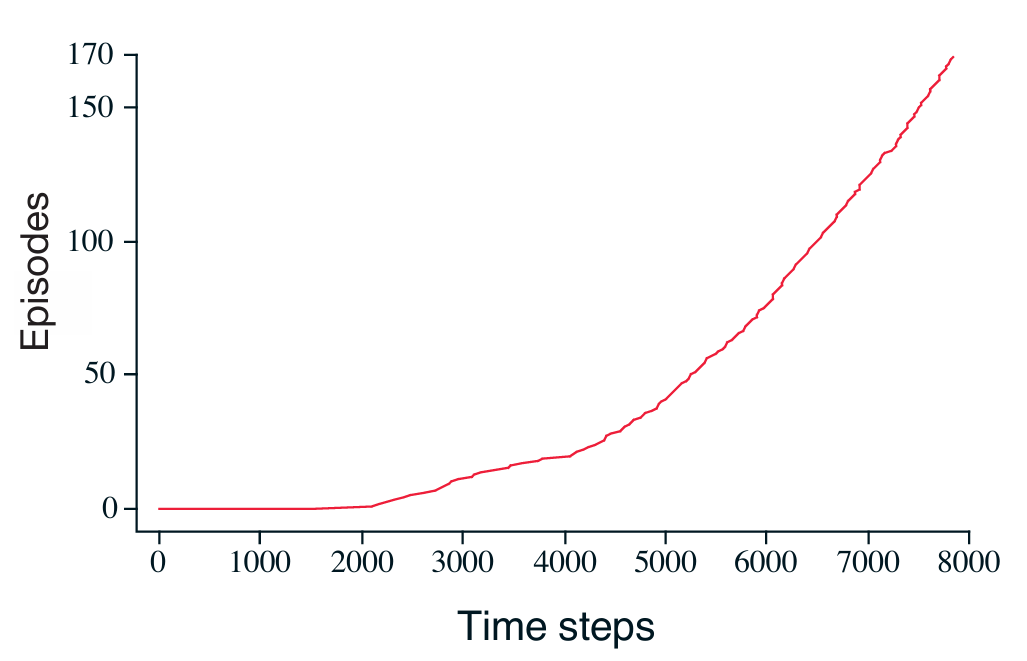

In [3]:
Image(filename="../book_images/Example_6_5_graph.PNG")

In [4]:
import numpy as np
import matplotlib
matplotlib.use('Agg')

import matplotlib.pyplot as plt

In [5]:
from src.windy_grid_world import world, play

In [6]:
# Create a 3-dimensional tensor for action-value estimates filled with 0s
action_value_estimates = np.zeros((world["height"], world["width"], 4))

# Maximum number of episodes
episode_limit = 170

In [7]:
# Create en empty list for total time steps in all episodes
total_time_steps = []

# Initial episode
episode = 0

while episode < episode_limit:
    # get the number of time steps in episode
    episode_time_steps = play(action_value_estimates)
    
    # append the number of time steps in episode to the list of total time steps in all episodes
    total_time_steps.append(episode_time_steps)

    # increment the episode number
    episode += 1

# Compute the accumulative sum of total time steps
total_time_steps = np.add.accumulate(total_time_steps)

In [8]:
# Plotting
plt.figure(figsize = (14,10))
plt.plot(total_time_steps, np.arange(1, len(total_time_steps) + 1))
plt.xlabel("Time steps")
plt.yticks([0, 50, 100, 150, 170])
plt.ylabel("Episodes")
plt.grid()

In [9]:
plt.savefig("../generated_images/example_6_5.png")
plt.close()

## Display the optimal policy

In [10]:
from src.windy_grid_world import goal, actions, wind

In [11]:
# Create an empty list for optimal policy
optimal_policy = []

for i in range(0, world["height"]):
    # append an empty list to the optimal policy list
    optimal_policy.append([])
    
    for j in range(0, world["width"]):
        # check if the goal state has been reached
        if [i, j] == goal:
            optimal_policy[-1].append('G')
            continue
        
        # get the best action
        best_action = np.argmax(action_value_estimates[i, j, :])
        
        # check if best action is "up"
        if best_action == actions[0]:
            optimal_policy[-1].append('↑')
        
        # check if best action is "down"
        elif best_action == actions[1]:
            optimal_policy[-1].append('↓')
        
        # check if best action is "left"
        elif best_action == actions[2]:
            optimal_policy[-1].append('←')
        
        # check if best action is "right"
        elif best_action == actions[3]:
            optimal_policy[-1].append('→')

In [12]:
print("Optimal policy is:")
for row in optimal_policy:
    print(row)

print(f"Wind strength for each column:\n{[str(w) for w in wind]}")

Optimal policy is:
['←', '←', '→', '→', '→', '→', '→', '→', '→', '↓']
['→', '←', '→', '→', '→', '→', '↑', '→', '↑', '↓']
['←', '→', '→', '→', '→', '→', '→', '↑', '→', '↓']
['→', '→', '→', '→', '→', '→', '→', 'G', '←', '↓']
['↓', '→', '→', '→', '↑', '→', '↑', '↓', '←', '←']
['↓', '→', '→', '↑', '↓', '↑', '↑', '↓', '←', '↓']
['←', '↑', '→', '→', '↑', '↑', '↑', '↑', '↑', '←']
Wind strength for each column:
['0', '0', '0', '1', '1', '1', '2', '2', '1', '0']
